# Imports 👇

In [267]:
import pandas
import numpy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
import seaborn
import matplotlib.pyplot as pyplot
%matplotlib inline

## Data Reading 👇

In [245]:
# this are the output classes, only two classes are there paitient will dead or alive
classes_list=['Alive','Dead']

In [263]:
data=pandas.read_csv('./heart_failure_clinical_records_dataset.csv')

In [264]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [256]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Suffling the data set 👇
this is to get splitted data, that have all type of the classes in training and testing
when we split the data set then their can be chances of all dead value rows can go in training and no row for the alive cases
hence at the time of model implementation model will only know the dead cases and not alive cases, that result in underfittiing ans will give high error at the time of prediction

In [220]:
shuffled_Data=data.sample(frac=1)

In [221]:
shuffled_Data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
172,70.0,1,171,0,60,1,176000.0,1.1,145,1,1,146,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
169,70.0,0,835,0,35,1,305000.0,0.8,133,0,0,145,0
124,60.0,0,582,0,40,0,217000.0,3.7,134,1,0,96,1
162,63.0,1,582,0,40,0,448000.0,0.9,137,1,1,123,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,50.0,1,298,0,35,0,362000.0,0.9,140,1,1,240,0
276,70.0,0,618,0,35,0,327000.0,1.1,142,0,0,245,0
83,79.0,1,55,0,50,1,172000.0,1.8,133,1,0,78,0
191,64.0,1,62,0,60,0,309000.0,1.5,135,0,0,174,0


## Splitting the dataset into training and testing 👇

For Training 83% data is being used and for testing 17% data is used from the given data

means 250 rows will be used for training and 49 rows will be used for testing

In [222]:
Training_Data=shuffled_Data[:250]
Testing_Data=shuffled_Data[250:]

## dividing the training data features and labels 👇 
this will be used for training of logistic regression model

In [223]:
training_Labels=Training_Data['DEATH_EVENT']
training_Features=Training_Data.drop(['DEATH_EVENT'],axis=1)

## dividing the testing data features and labels 👇 
this will be used for testing the logistic regression model

In [224]:
testing_Labels=Testing_Data['DEATH_EVENT']
testing_Features=Testing_Data.drop(['DEATH_EVENT'],axis=1)

# Creating the logistic regression model instance(object) 👇

In [225]:
model=LogisticRegression(max_iter=1000)

### fitting the model 👇

In [226]:
model.fit(training_Features,training_Labels)

LogisticRegression(max_iter=1000)

#### Now model is Trained 👆

## ________________________________________________________________________

## Optional Part 👇
### checking model on training data to check training accuracy (not needed)

              precision    recall  f1-score   support

       Alive       0.84      0.91      0.87       175
        Dead       0.74      0.60      0.66        75

    accuracy                           0.82       250
   macro avg       0.79      0.75      0.77       250
weighted avg       0.81      0.82      0.81       250



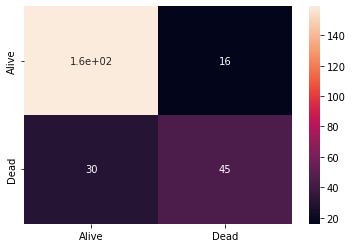

In [268]:
training_predicted_values=model.predict(training_Features)
training_classification_data=confusion_matrix(training_Labels,training_predicted_values)
seaborn.heatmap(training_classification_data,annot=True,xticklabels=classes_list,yticklabels=classes_list)
print(classification_report(training_Labels,training_predicted_values,target_names=classes_list))

Training accuracy is 82%

# ________________________________________

# Now Testing the model 👇

In [227]:
predicted_values=model.predict(testing_Features)

In [228]:
predicted_values

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

### Following will show that what is actual value and what is predicted by model 👇

In [246]:
predicted_values=list(predicted_values)
testing_Labels=list(testing_Labels)
print("Actual Values --> Predicted values")
for i in range(len(predicted_values)):
    print("          ",testing_Labels[i]," --> ",predicted_values[i])

Actual Values --> Predicted values
           1  -->  1
           1  -->  1
           0  -->  1
           1  -->  0
           1  -->  0
           0  -->  0
           1  -->  1
           0  -->  0
           1  -->  0
           1  -->  1
           0  -->  0
           1  -->  1
           0  -->  0
           0  -->  0
           0  -->  0
           1  -->  0
           0  -->  1
           1  -->  1
           0  -->  0
           0  -->  0
           0  -->  0
           1  -->  1
           1  -->  1
           0  -->  0
           0  -->  0
           1  -->  1
           1  -->  1
           0  -->  0
           0  -->  0
           1  -->  1
           1  -->  1
           0  -->  0
           0  -->  0
           0  -->  0
           1  -->  1
           0  -->  0
           1  -->  1
           1  -->  1
           1  -->  1
           0  -->  0
           1  -->  1
           0  -->  0
           0  -->  0
           0  -->  0
           0  -->  0
           0  -->  0

## plotting the confusion matrix for model of tested data 👇

In [247]:
classification_data=confusion_matrix(testing_Labels,predicted_values)

In [248]:
classification_data

array([[26,  2],
       [ 4, 17]], dtype=int64)

<AxesSubplot:>

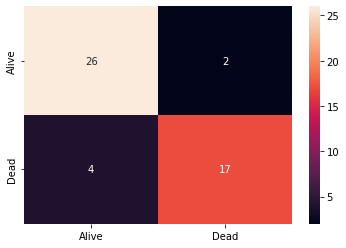

In [269]:
seaborn.heatmap(classification_data,annot=True,xticklabels=classes_list,yticklabels=classes_list)

## This is the calculation of accuracy of the model and precision of the respective classes 👇

In [250]:
print(classification_report(testing_Labels,predicted_values,target_names=classes_list))

              precision    recall  f1-score   support

       Alive       0.87      0.93      0.90        28
        Dead       0.89      0.81      0.85        21

    accuracy                           0.88        49
   macro avg       0.88      0.87      0.87        49
weighted avg       0.88      0.88      0.88        49



## Testing on new Data 👇
for,

age=45 (age is 45)         <br/>
anaemia=0 (no anaemia symptom)      <br/>
creatinine_phosphokinase=552 (level of creatinine phosphokinase in heart)      <br/>
diabetes=0 (no diabetes)
ejection_fraction=30 (ejection fraction reading is 20 for heart)      <br/>
high_blood_pressure=0 (no presence of high blood pressure)      <br/>
platelets=265000 (platelets level in heart)      <br/>
serum_creatinine=1.9 (serum creatinine value)      <br/>
serum_sodium=130 (serum sodium value)     <br/>
sex=1 (man)      <br/>
smoking=0 (no smoking habbit)      <br/>
time=4 (Condition Follow-up period in days)      <br/>

##### (Correct Output Should be Alive)

In [254]:
new_data=[45,0,552,0,50,0,265000,1.9,130,1,0,4]
print(classes_list[model.predict([new_data])[0]])

Alive
